In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv("~/Desktop/thesis/experiment/data/Adams_experiment.csv")

698

In [24]:
# Raw

df.head(24)

In [4]:
## FILTERING

# (a) what condition the participant was in (cond = 1 is gains)
# filter on cond=1 only
data = df.loc[df["cond"]==1, ["subject", "word", "s2_value", "in.cs", "order"]]

In [5]:
## ENRICHING

In [6]:
# create num_eval column
num_eval = data[data["in.cs"] == True].groupby("subject").count()["word"].rename("num_eval")

# could also create a num_eval column using the max of order
num_eval_using_max_order = data.groupby("subject").max()["order"]
print(sum(num_eval == num_eval_using_max_order))

num_eval = num_eval[num_eval == num_eval_using_max_order]

# where these are different, exclude that data
data = data.merge(num_eval, right_on="subject", left_on="subject")


811


In [7]:
# drop non-evaluated entries
data = data[data["in.cs"]]

In [8]:
# create best option evaluated so far column
data["highest_value_so_far"] = data.sort_values(["subject", "order"]).groupby("subject")["s2_value"].cummax()

In [9]:
# Create column whether that was their last one
data["did_continue_eval"] = ~(data["order"] == data["num_eval"])

In [10]:
# Exclude subjects that only went through the months
# Don't run this if you want to look at all subjects

annual_order = ["JANUARY", "FEBRUARY", "MARCH", "APRIL", "MAY", "JUNE", "JULY", "AUGUST", "SEPTEMBER", "OCTOBER", "NOVEMBER", "DECEMBER"]
annual_order_df = pd.DataFrame.from_dict({"word": annual_order})
annual_order_df["annual_order"] = annual_order_df.index + 1

with_order = data.merge(annual_order_df)[["subject", "word", "order", "annual_order"]]
with_order["is_in_order"] = with_order["order"] == with_order["annual_order"]
subjects_stuck_to_annual_order = with_order.groupby("subject")[["is_in_order"]].all().reset_index()
data = data.merge(subjects_stuck_to_annual_order, how="left")
data = data[~data["is_in_order"]].sort_values(["subject", "order"])


In [11]:
# Add column indicating the rank of the word considered (based on its s2_value)

word_values = data.groupby("word")["s2_value"].mean()
word_rank = word_values.sort_values(ascending=False).reset_index().drop(columns="s2_value")
word_rank["rank"] = word_rank.index + 1
data = data.merge(word_rank).rename(columns={"index": "rank"}).sort_values("subject")

In [12]:
# Exclude order numbers above 12
data = data[data["order"] <= 12]

In [13]:
# Filtered, enriched

data.head(24)

,subject,word,s2_value,in.cs,order,num_eval,highest_value_so_far,did_continue_eval,is_in_order,rank
0,COPIEDA2CADBAAV9NDO4,SEPTEMBER,16,True,1.0,2,16,True,False,6
298,COPIEDA2CADBAAV9NDO4,OCTOBER,20,True,2.0,2,20,False,False,3
890,A0467121226LDESR9HWNF,NOVEMBER,22,True,2.0,2,22,False,False,2
581,A0467121226LDESR9HWNF,MARCH,18,True,1.0,2,18,True,False,5
582,A0505289TSH2NC1YOHYK,MARCH,18,True,4.0,4,18,False,False,5
1512,A0505289TSH2NC1YOHYK,FEBRUARY,2,True,2.0,4,18,True,False,12
1779,A0505289TSH2NC1YOHYK,JULY,12,True,3.0,4,18,True,False,9
1241,A0505289TSH2NC1YOHYK,APRIL,18,True,1.0,4,18,True,False,4
1944,A0989239BAD79O16H0DE,AUGUST,7,True,1.0,1,7,False,False,10
1242,A101U3FTZYY87V,APRIL,18,True,5.0,5,18,False,False,4


In [16]:
# Uncomment if excluding pure order subjects
data.to_csv("~/Desktop/thesis/experiment/data/Adams_experiment_cleaned_filtered.csv")

# Uncomment if including all subjects
# data.to_csv("~/Desktop/thesis/experiment/data/Adams_experiment_cleaned_all.csv")

In [129]:
## ANALYSIS

In [130]:
# Summary stats
data.groupby("did_continue_eval")["highest_value_so_far"].mean()

did_continue_eval
False    22.038177
True     18.183442
Name: highest_value_so_far, dtype: float64

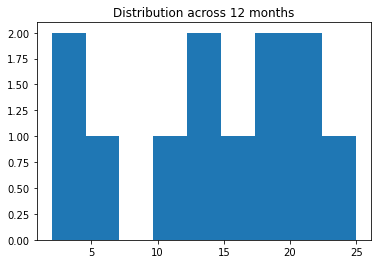

In [131]:
# How many months have which value?
# This is the distribution of options (all of them)
# across values (ex: 2 options with value < 5)

word_values = data.groupby("word")["s2_value"].mean()
minimum = min(word_values)
maximim = max(word_values)
bins = np.linspace(minimum, maximim, 10)
plt.hist(data.groupby("word")["s2_value"].mean(), bins)
plt.title("Distribution across 12 months")
plt.show()

total number of subjects 811
Number of data points: 811


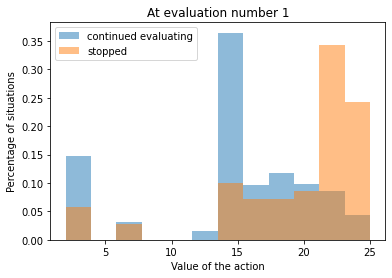

Number of data points: 742


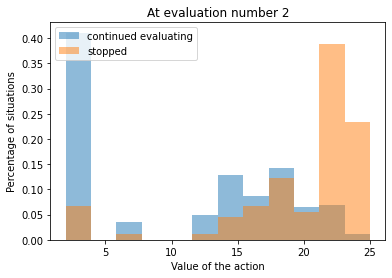

Number of data points: 652


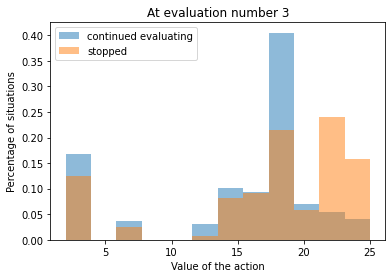

Number of data points: 529


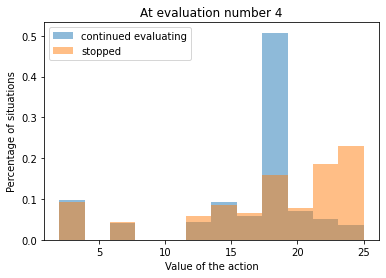

Number of data points: 390


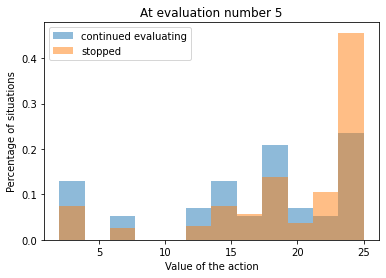

In [132]:
# For a specific slice in evaluation (fixed number
# of options already considered), how does the value
# of the next option compare for those who
# stopped after evaluating this option vs those
# who continued?

print(f"total number of subjects {len(data.groupby('subject').mean().index)}")

for order_filter in range(1, 6):
    filtered_data = data[data["order"]==order_filter]

    word_values = data.groupby("word")["s2_value"].mean()
    minimum = min(word_values)
    maximim = max(word_values)

    non_last_eval = filtered_data.loc[filtered_data["did_continue_eval"], "s2_value"]
    last_eval = filtered_data.loc[~filtered_data["did_continue_eval"], "s2_value"]

    bins = np.linspace(minimum, maximim, 13)
    
    print(f"Number of data points: {len(filtered_data.index)}")

    plt.hist(non_last_eval, bins, alpha=0.5, label='continued evaluating', weights=np.ones(len(non_last_eval)) / len(non_last_eval))
    plt.hist(last_eval, bins, alpha=0.5, label='stopped', weights=np.ones(len(last_eval)) / len(last_eval))
    plt.legend(loc='upper left')
    plt.xlabel("Value of the action")
    plt.ylabel("Percentage of situations")
    plt.title(f"At evaluation number {order_filter}")
    plt.show()

Number of data points: 811


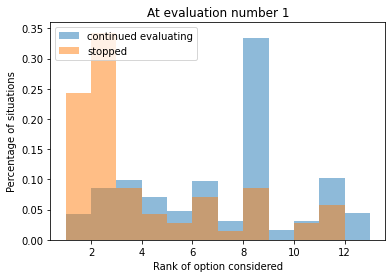

Number of data points: 742


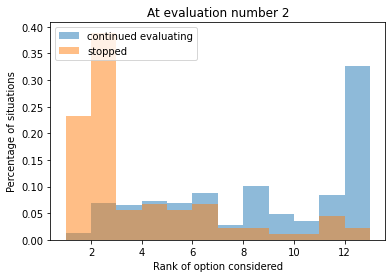

Number of data points: 652


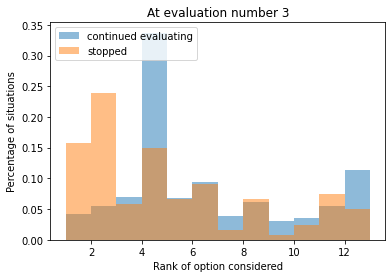

Number of data points: 529


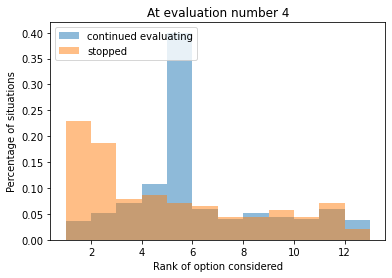

Number of data points: 390


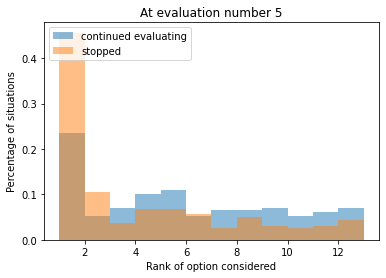

In [133]:
# Now do the same thing for rank

for order_filter in range(1, 6):
    filtered_data = data[data["order"]==order_filter]
    non_last_eval = filtered_data.loc[filtered_data["did_continue_eval"], "rank"]
    last_eval = filtered_data.loc[~filtered_data["did_continue_eval"], "rank"]

    word_rank = data.groupby("word")["rank"].mean()
    minimum = min(word_rank)
    maximim = max(word_rank)
    bins = np.linspace(1, len(word_rank)+1, len(word_rank)+1)

    print(f"Number of data points: {len(filtered_data.index)}")

    plt.hist(non_last_eval, bins, alpha=0.5, label='continued evaluating', weights=np.ones(len(non_last_eval)) / len(non_last_eval))
    plt.hist(last_eval, bins, alpha=0.5, label='stopped', weights=np.ones(len(last_eval)) / len(last_eval))
    plt.legend(loc='upper left')
    plt.xlabel("Rank of option considered")
    plt.ylabel("Percentage of situations")
    plt.title(f"At evaluation number {order_filter}")
    plt.show()

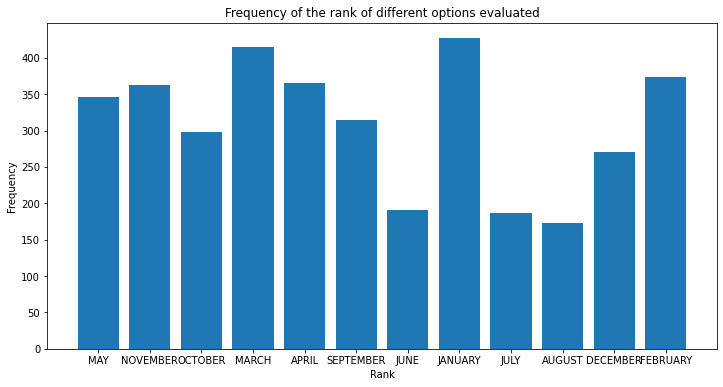

In [134]:
# Across all options evaluated in different orders,
# what was the distribution? sorted by rank

rank_and_count = data.groupby("rank").count()[["word"]].rename(columns={"word": "count"}).reset_index()
word_and_rank = data.groupby("word").mean()[["rank"]].reset_index()
to_plot = rank_and_count.merge(word_and_rank).sort_values("rank")

fig = plt.figure(figsize=(12, 6))
plt.bar(to_plot["word"], height=to_plot["count"])
plt.title("Frequency of the rank of different options evaluated")
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.show()

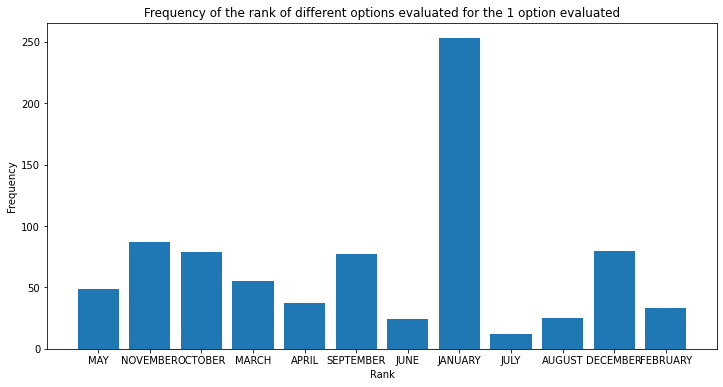

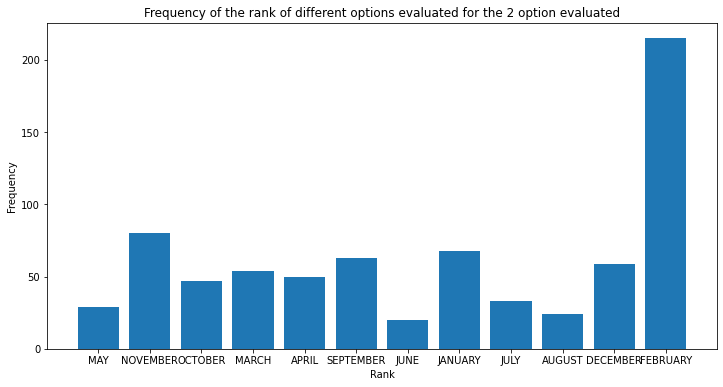

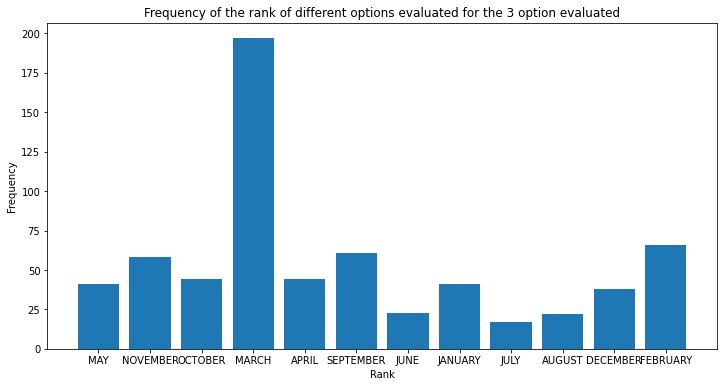

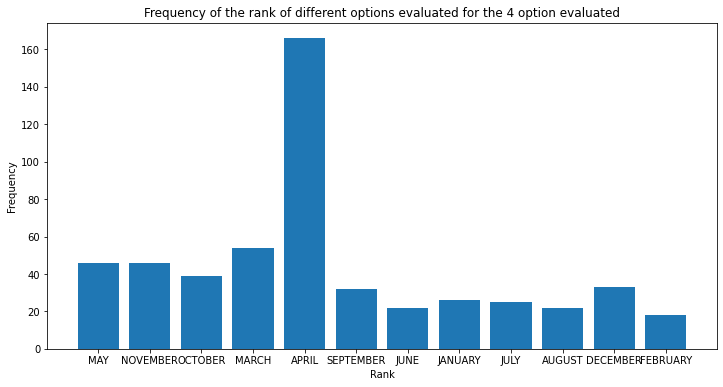

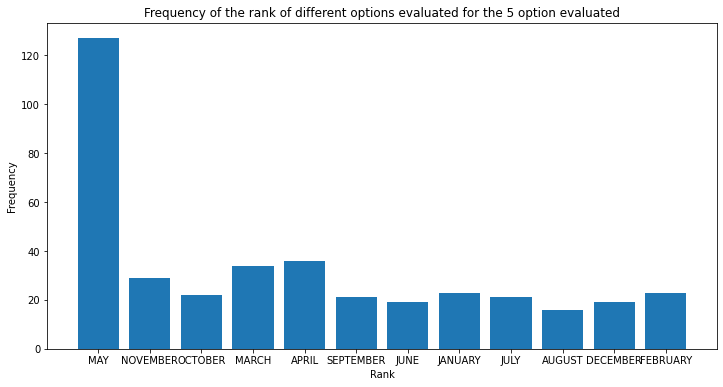

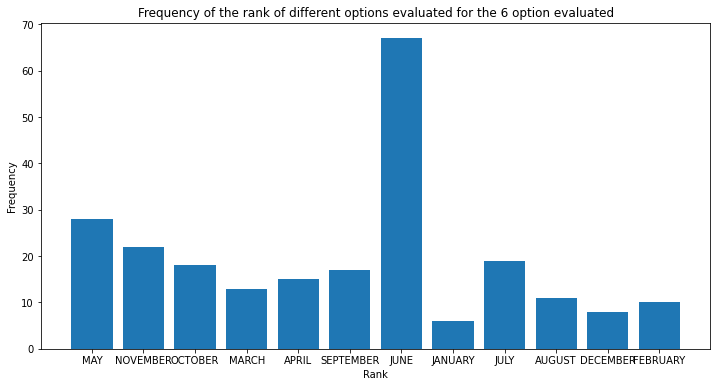

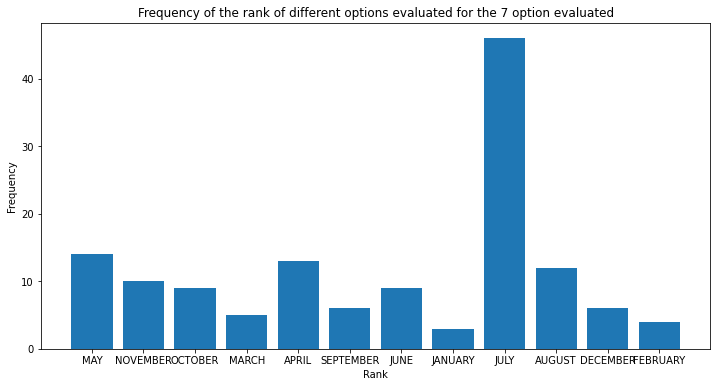

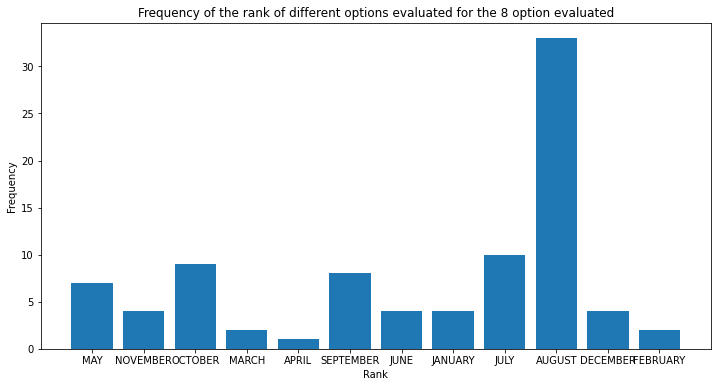

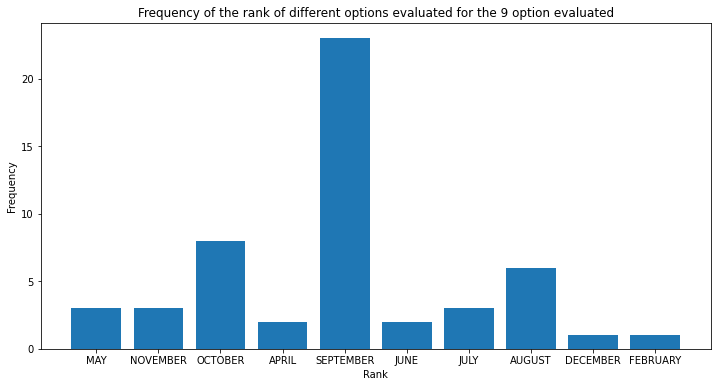

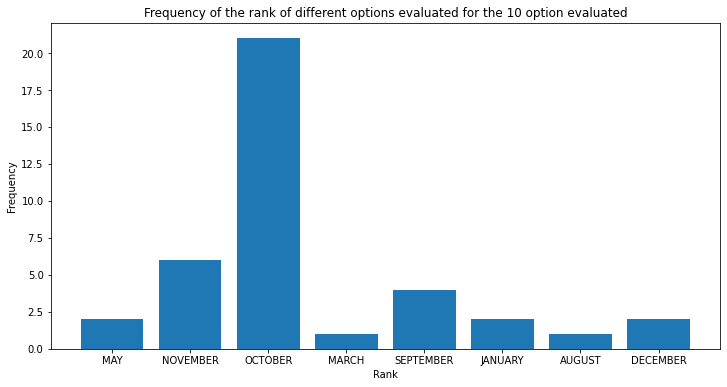

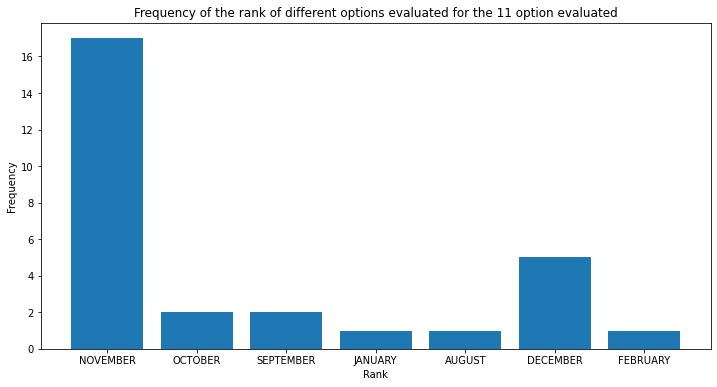

In [135]:
# For a specific number of options already evaluated,
# what was the distribution? sorted by rank

for order in range(1, 12):

    rank_and_count = data[data["order"]==order].groupby("rank").count()[["word"]].rename(columns={"word": "count"}).reset_index()
    word_and_rank = data[data["order"]==order].groupby("word").mean()[["rank"]].reset_index()
    to_plot = rank_and_count.merge(word_and_rank).sort_values("rank")

    fig = plt.figure(figsize=(12, 6))
    plt.bar(to_plot["word"], height=to_plot["count"])
    plt.title(f"Frequency of the rank of different options evaluated for the {order} option evaluated")
    plt.xlabel("Rank")
    plt.ylabel("Frequency")
    plt.show()

In [136]:
# Looks like we're still getting a lot of people going through the months,
# I thought we had sorted those out?

february_second_subjects = data.loc[(data["order"]==2)&(data["word"]=="FEBRUARY"), ["subject"]]
february_second_subjects.merge(data).sort_values(["subject", "order"]).head(24)

# We did sort those out, but many who didn't perfectly stick to the order still followed it
# partly, see below

,subject,word,s2_value,in.cs,order,num_eval,highest_value_so_far,did_continue_eval,rank
0,\nCopied\nA1GBC5SPFDQ1VG,JANUARY,14,True,1.0,3,14,True,8
2,\nCopied\nA1GBC5SPFDQ1VG,FEBRUARY,2,True,2.0,3,14,True,12
1,\nCopied\nA1GBC5SPFDQ1VG,MARCH,18,True,3.0,3,18,False,4
3,A0505289TSH2NC1YOHYK,APRIL,18,True,1.0,4,18,True,5
5,A0505289TSH2NC1YOHYK,FEBRUARY,2,True,2.0,4,18,True,12
6,A0505289TSH2NC1YOHYK,JULY,12,True,3.0,4,18,True,9
4,A0505289TSH2NC1YOHYK,MARCH,18,True,4.0,4,18,False,4
8,A09828489COFZEKIGNMJ,JANUARY,14,True,1.0,5,14,True,8
7,A09828489COFZEKIGNMJ,FEBRUARY,2,True,2.0,5,14,True,12
9,A09828489COFZEKIGNMJ,MARCH,18,True,3.0,5,18,True,4


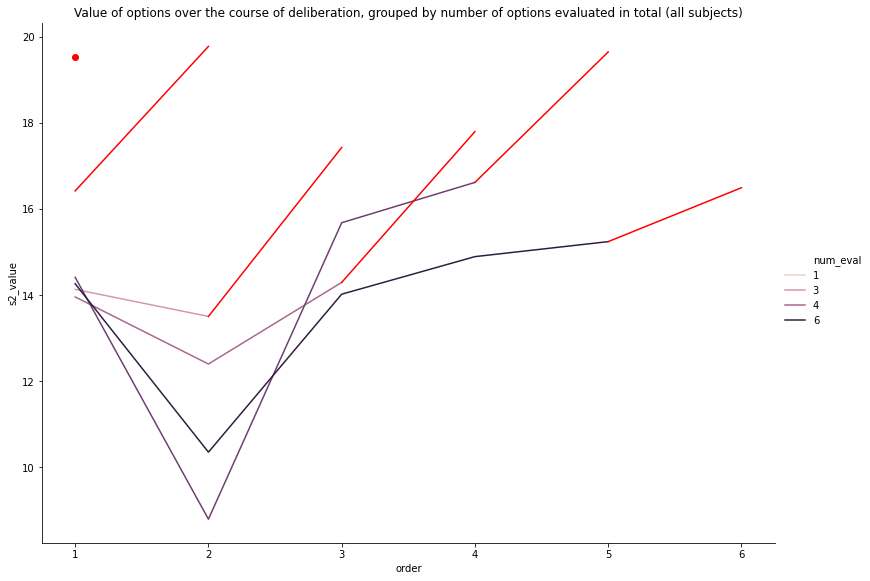

In [137]:
# Each line is the average for all subjects with the same total number
# of options evaluated. The y axis specifies the average s2 values for
# each number of options already evaluated. The lines are each one
# longer than the next because those with 6 options evaluated have
# one more datapoint than those that only evaluated 5 in total.

max_num_eval = 6

to_plot = data.groupby(["order", "num_eval"]).agg({"s2_value": "mean"}).reset_index()
to_plot = to_plot[(to_plot["order"] != np.NaN)&(to_plot["num_eval"] <= max_num_eval)]
sns.relplot(data=to_plot[to_plot["num_eval"]!=to_plot["order"]], x="order", y="s2_value", kind="line", hue="num_eval", height=8, aspect=11/8)

last_line = to_plot[(to_plot["num_eval"]==to_plot["order"])|(to_plot["num_eval"]==to_plot["order"]+1)]
for num_eval in last_line["num_eval"].unique():
    plt.plot(last_line.loc[last_line["num_eval"]==num_eval, "order"], last_line.loc[last_line["num_eval"]==num_eval, "s2_value"], color="red")

only_one = to_plot[(to_plot["order"]==1)&(to_plot["num_eval"]==1)]
plt.scatter(only_one["num_eval"], only_one["s2_value"], color="red")
plt.title("Value of options over the course of deliberation, grouped by number of options evaluated in total (all subjects)")
plt.show()

# It looks like we do have quite a considerable bump at the end of each line,
# which is strong support for the dynamic theory, that the overall downsloping
# (flat in this case) trend is superseded by the fact that subjects stopped
# being due to having found something good.

# I attribute the almost across the board bump down for the second option evaluated
# to February being frequently evaluated second (see previous charts)

Rank of options over the course of deliberation, grouped by number of options evaluated in total


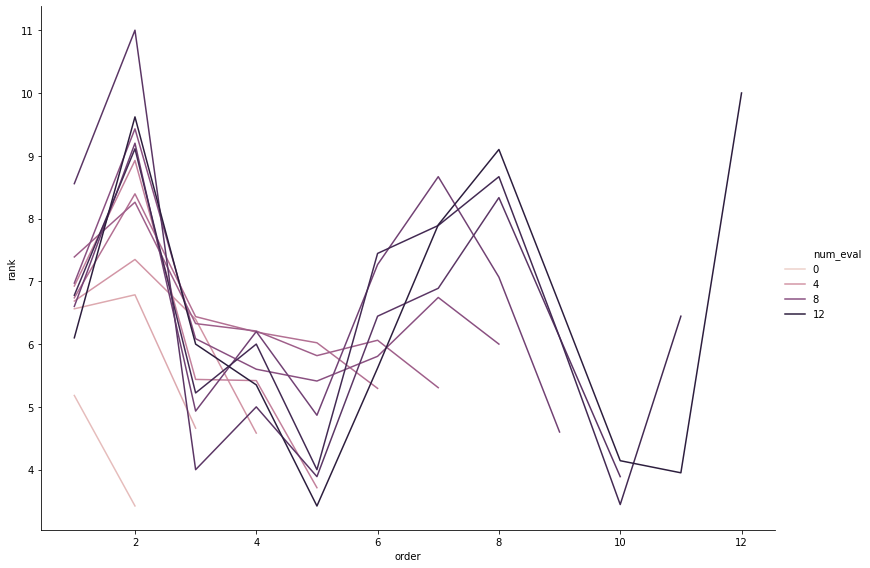

In [138]:
# Now do the same thing for rank

to_plot = data.groupby(["order", "num_eval"]).agg({"rank": "mean"}).reset_index()
sns.relplot(data=to_plot, x="order", y="rank", kind="line", hue="num_eval", height=8, aspect=11/8)
print("Rank of options over the course of deliberation, grouped by number of options evaluated in total")

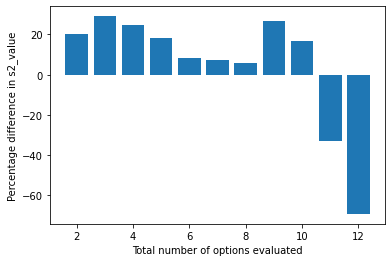

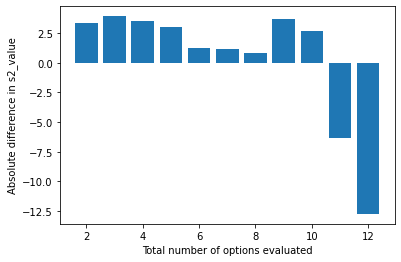

In [139]:
# Let's quantify how much the subjects gain in value in the last option
# they evaluate

rank_or_s2value = "s2_value"

to_plot = data.groupby(["order", "num_eval"]).agg({rank_or_s2value: "mean"}).reset_index()
final_option = to_plot[to_plot["order"]==to_plot["num_eval"]].rename(columns={rank_or_s2value: "final"}).drop(columns=["order"])
to_plot_with_final = to_plot.merge(final_option, how="left")
second_to_last_option = to_plot_with_final[to_plot_with_final["order"]==to_plot_with_final["num_eval"]-1]

percentage_increase = second_to_last_option.assign(percentage_increase=((second_to_last_option["final"]/second_to_last_option[rank_or_s2value])-1)*100)
plt.bar(x=percentage_increase["num_eval"], height=percentage_increase["percentage_increase"])
plt.xlabel("Total number of options evaluated")
plt.ylabel(f"Percentage difference in {rank_or_s2value}")
plt.show()

difference = second_to_last_option.assign(percentage_increase=second_to_last_option["final"]-second_to_last_option[rank_or_s2value])
plt.bar(x=difference["num_eval"], height=difference["percentage_increase"])
plt.xlabel("Total number of options evaluated")
plt.ylabel(f"Absolute difference in {rank_or_s2value}")
plt.show()

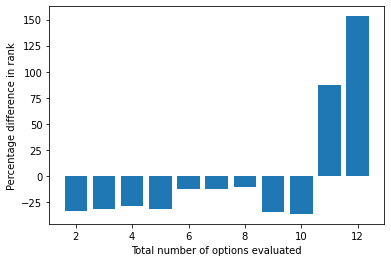

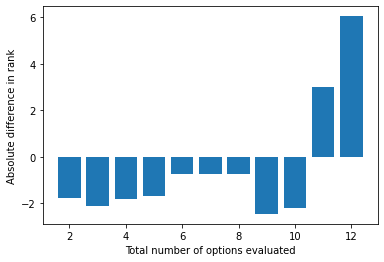

In [140]:
# now do the same thing for rank

rank_or_s2value = "rank"

to_plot = data.groupby(["order", "num_eval"]).agg({rank_or_s2value: "mean"}).reset_index()
final_option = to_plot[to_plot["order"]==to_plot["num_eval"]].rename(columns={rank_or_s2value: "final"}).drop(columns=["order"])
to_plot_with_final = to_plot.merge(final_option, how="left")
second_to_last_option = to_plot_with_final[to_plot_with_final["order"]==to_plot_with_final["num_eval"]-1]

percentage_increase = second_to_last_option.assign(percentage_increase=((second_to_last_option["final"]/second_to_last_option[rank_or_s2value])-1)*100)
plt.bar(x=percentage_increase["num_eval"], height=percentage_increase["percentage_increase"])
plt.xlabel("Total number of options evaluated")
plt.ylabel(f"Percentage difference in {rank_or_s2value}")
plt.show()

difference = second_to_last_option.assign(percentage_increase=second_to_last_option["final"]-second_to_last_option[rank_or_s2value])
plt.bar(x=difference["num_eval"], height=difference["percentage_increase"])
plt.xlabel("Total number of options evaluated")
plt.ylabel(f"Absolute difference in {rank_or_s2value}")
plt.show()

In [235]:
# How does probability of a month being the last value
# change as a function of the value of that month?

word_values = data.groupby("word")["s2_value"].mean()
continue_eval_probabilities = data.groupby("word").agg({"did_continue_eval": "mean"})
continue_eval_probabilities["did_stop_eval"] = 1-continue_eval_probabilities["did_continue_eval"]
to_plot = pd.DataFrame(word_values).join(continue_eval_probabilities).sort_values("s2_value")

#to_plot.to_csv("~/Desktop/all-subject-prob-eval-value")

x = np.array(to_plot["s2_value"])
y = np.array(to_plot["did_stop_eval"])

In [236]:
from sklearn import linear_model
from scipy.special import expit
import scipy.optimize as opt

# Fit a logistic function to the data from the cell above

Coefficient: 0.0907
Resulting odds ratio: 1.0950


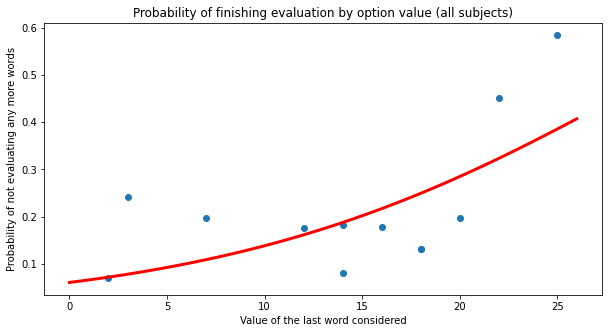

In [242]:
# Using sklearn to optimize

x_clf = np.array(data["s2_value"])
y_clf = np.array(1-data["did_continue_eval"])
clf = linear_model.LogisticRegression()
clf.fit(x_clf.reshape(-1, 1), y_clf)

plt.figure(figsize=(10, 5))

plt.scatter(to_plot["s2_value"], to_plot["did_stop_eval"])

x_test = np.linspace(0, 26, 100)
loss = expit(x_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(x_test, loss, color='red', linewidth=3)

plt.title("Probability of finishing evaluation by option value (all subjects)")
plt.xlabel("Value of the last word considered")
plt.ylabel("Probability of not evaluating any more words")

print(f"Coefficient: {clf.coef_[0][0]:.4f}")
print(f"Resulting odds ratio: {np.exp(clf.coef_[0][0]):.4f}")

plt.show()

14.860327692720924

In [263]:
len(x_clf)

3723

Coefficient: 0.0907
Resulting odds ratio: 1.0950


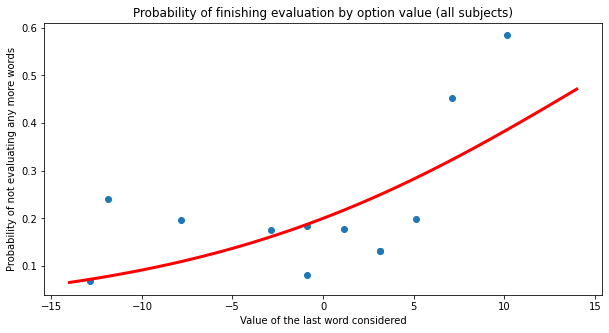

In [265]:
# Using sklearn to optimize

mn =  np.mean(np.array(data["s2_value"]))
x_clf = np.array(data["s2_value"]) - mn
y_clf = np.array(1-data["did_continue_eval"])
clf = linear_model.LogisticRegression()
clf.fit(x_clf.reshape(-1, 1), y_clf)

plt.figure(figsize=(10, 5))

plt.scatter(to_plot["s2_value"]-mn, to_plot["did_stop_eval"])

x_test = np.linspace(-14, 14, 100)
loss = expit(x_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(x_test, loss, color='red', linewidth=3)

plt.title("Probability of finishing evaluation by option value (all subjects)")
plt.xlabel("Value of the last word considered")
plt.ylabel("Probability of not evaluating any more words")

print(f"Coefficient: {clf.coef_[0][0]:.4f}")
print(f"Resulting odds ratio: {np.exp(clf.coef_[0][0]):.4f}")

plt.show()

In [ ]:
# need to fit a random slope and intercept per participant
# random 

In [266]:
clf.coef_, clf.intercept_

(array([[0.09073089]]), array([-1.38597108]))

In [269]:
np.mean(y_clf)

0.21810367982809561

In [270]:
np.log(0.21/(1-0.21))

-1.3249254147435987

Coefficient: 0.1532
Resulting odds ratio: 1.1656
P(y=1|X=1) H0: 0.0197


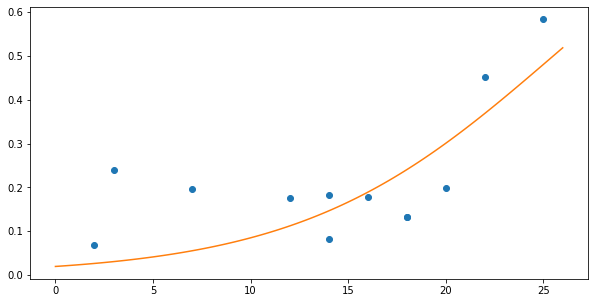

In [246]:
# Using function optimization directly

def f(x, a, b):
    return 1 / (1. + np.exp(-1*(a + b*x)))

popt, pcov = opt.curve_fit(f, x, y, method="trf")
print(f"Coefficient: {popt[1]:.4f}")
print(f"Resulting odds ratio: {np.exp(popt[1]):.4f}")
print(f"P(y=1|X=1) H0: {np.exp(popt[0])/(1+np.exp(popt[0])):.4f}")

x_test = np.linspace(0, 26, 100)
y_fit = f(x_test, *popt)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(x, y, 'o')
ax.plot(x_test, y_fit, '-')
plt.show()

In [250]:
np.mean(y_clf)

0.21810367982809561

In [256]:
y

array([0.06951872, 0.24074074, 0.19653179, 0.17647059, 0.08196721,
       0.18324607, 0.17834395, 0.13150685, 0.13253012, 0.19798658,
       0.45179063, 0.58381503])

In [253]:
np.log(0.21/(1-0.21))

0.26582278481012656

In [ ]:
y_trans = y_trans - np.mean(y)

In [ ]:
# Using function optimization directly

def f(x, a, b):
    return 1 / (1. + np.exp(-1*(a + b*x)))

popt, pcov = opt.curve_fit(f, x, y, method="trf")
print(f"Coefficient: {popt[1]:.4f}")
print(f"Resulting odds ratio: {np.exp(popt[1]):.4f}")
print(f"P(y=1|X=1) H0: {np.exp(popt[0])/(1+np.exp(popt[0])):.4f}")

x_test = np.linspace(0, 26, 100)
y_fit = f(x_test, *popt)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(x, y, 'o')
ax.plot(x_test, y_fit, '-')
plt.show()